In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from azureml.core import Workspace, Dataset

## GET DATA

In [2]:
df = pd.read_csv("dataset/weather_dataset_raw.csv")

In [3]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


## DATA PREPROCESSING

1. DATA QUALITY ASSESSMENT

Look for the accuracy, completeness, reliability, relevance, and timeliness

In [4]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [5]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S_No                    96453 non-null  int64  
 1   Timestamp               96453 non-null  object 
 2   Location                96453 non-null  object 
 3   Temperature_C           96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind_speed_kmph         96453 non-null  float64
 7   Wind_bearing_degrees    96453 non-null  int64  
 8   Visibility_km           96453 non-null  float64
 9   Pressure_millibars      96453 non-null  float64
 10  Weather_conditions      96448 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


## CALIBRATING MISSING DATA

In [8]:
df['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

## LABEL ENCODING

In [9]:
df['Weather_conditions'].value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [10]:
# Weather_conditions can be simplified by categorizing the column label into two labels, rain or no_rain.
df['Weather_conditions'].replace({"snow": "no_rain", "clear":"no_rain"}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df["Weather_conditions"]
y = le.fit_transform(y)

y = pd.DataFrame(y, columns=["Current_weather_condition"])
df = pd.concat([df, y], axis=1)
df.drop(["Weather_conditions"], axis=1, inplace=True)

In [12]:
df.head(2)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1


In [13]:
df['Future_weather_condition'] = df.Current_weather_condition.shift(4, axis = 0)

In [14]:
df.dropna(inplace=True)

In [15]:
df

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1.0
5,5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1.0
6,6,2006-04-01 06:00:00+02:00,"Port of Turku, Finland",7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,1,1.0
7,7,2006-04-01 07:00:00+02:00,"Port of Turku, Finland",8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,1,1.0
8,8,2006-04-01 08:00:00+02:00,"Port of Turku, Finland",10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,96269,2016-09-03 08:00:00+02:00,"Port of Turku, Finland",19.483333,19.483333,0.71,7.2772,2,15.1501,1018.90,0,0.0
96449,96272,2016-09-03 11:00:00+02:00,"Port of Turku, Finland",27.616667,27.100000,0.36,6.8425,350,15.5526,1019.14,0,0.0
96450,96295,2016-09-30 10:00:00+02:00,"Port of Turku, Finland",17.988889,17.988889,0.64,7.7763,182,15.7297,1020.58,0,0.0
96451,96298,2016-09-30 13:00:00+02:00,"Port of Turku, Finland",25.000000,25.000000,0.39,12.6063,202,16.1000,1019.87,0,0.0


In [16]:
df['Future_weather_condition'].value_counts()

1.0    82271
0.0    14178
Name: Future_weather_condition, dtype: int64

## DATA CORRELATION AND FILTERING

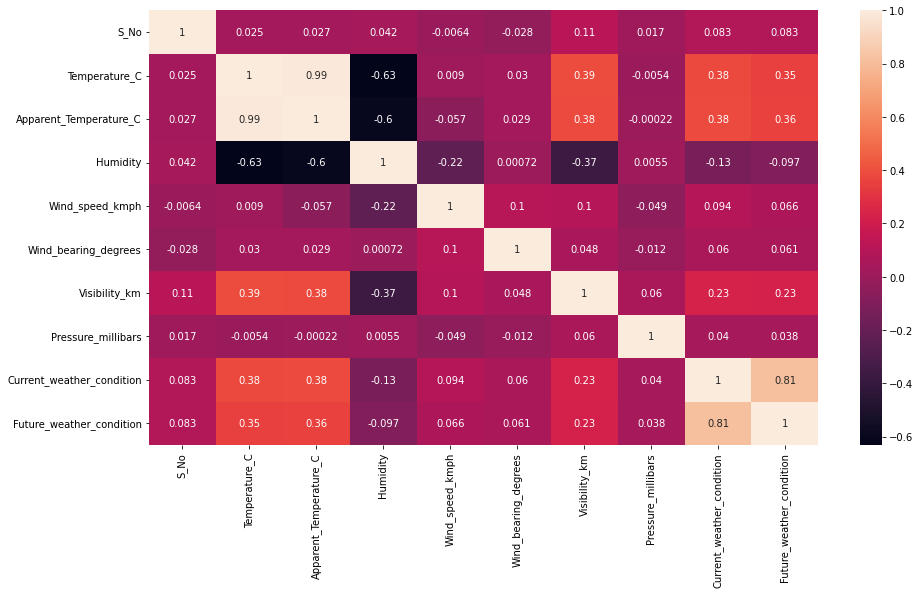

In [17]:
plt.figure(figsize=(15,8))
corrMatrix = df.corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

<AxesSubplot:>

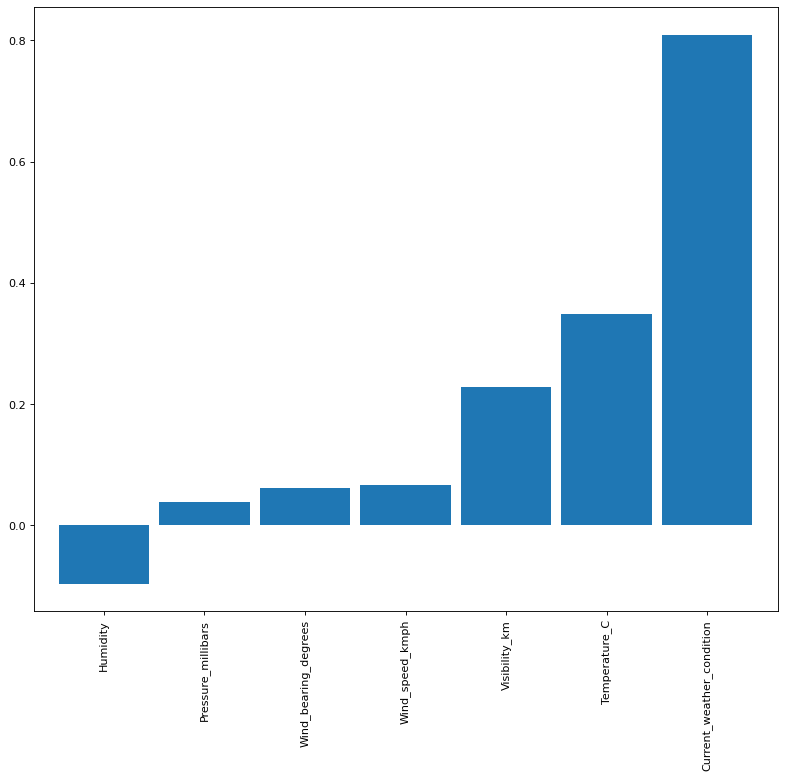

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Future_weather_condition'].sort_values(ascending=True).drop(['Future_weather_condition']).plot(kind='bar', width=0.9)

## TIME SERIE ANALYSIS

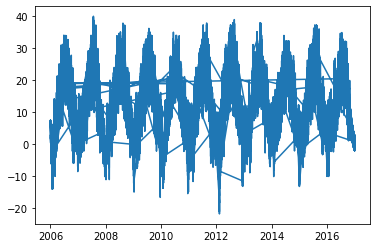

In [20]:
time = df['Timestamp']
temp = df['Temperature_C']
# plot graph
plt.plot(time, temp)
plt.show()

In [21]:
# Save processed dataset 
df.to_csv('dataset/weather_dataset_processed.csv',index=False)

## REGISTER DATA

In [22]:
subscription_id = '32c57e29-730e-4a59-8135-3114ba66cb03'
resource_group = 'Learn_MLOps'
workspace_name = 'MLOps_WS'
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [23]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [24]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='dataset', target_path='data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 2 files
Target already exists. Skipping upload for data\weather_dataset_processed.csv
Target already exists. Skipping upload for data\weather_dataset_raw.csv
Uploaded 0 files


$AZUREML_DATAREFERENCE_7a13c08e850d4ac28f69937fb82325d0

In [25]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [26]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
0,2006-04-01 02:00:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1.0
1,2006-04-01 03:00:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1.0
2,2006-04-01 04:00:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,1,1.0


In [27]:
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data_portofTurku',
                                 description='processed weather data')